# PCA 실습 3. Oilvetti dataset

> 이 데이터는 본래 얼굴 인식용 학습 데이터로 사용되는 것인데,
> 특정 한 인물의 데이터(10장)만 이용해서 PCA 실습용으로 사용한다.

- This dataset contains a set of face images.

- 총 40명의 얼굴 사진

- 한 사람 당 10가지 표정에 대한 이미지 데이터

</br>

## --▶ Dataset Load

In [1]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [2]:
K = 20
faces = faces_all.images[faces_all.target==K]
faces #--> 이미지의 픽셀값

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

In [5]:
faces.shape

(10, 64, 64)

## --▶ Data 확인

- 20번 사람의 얼굴 사진 10장 원본

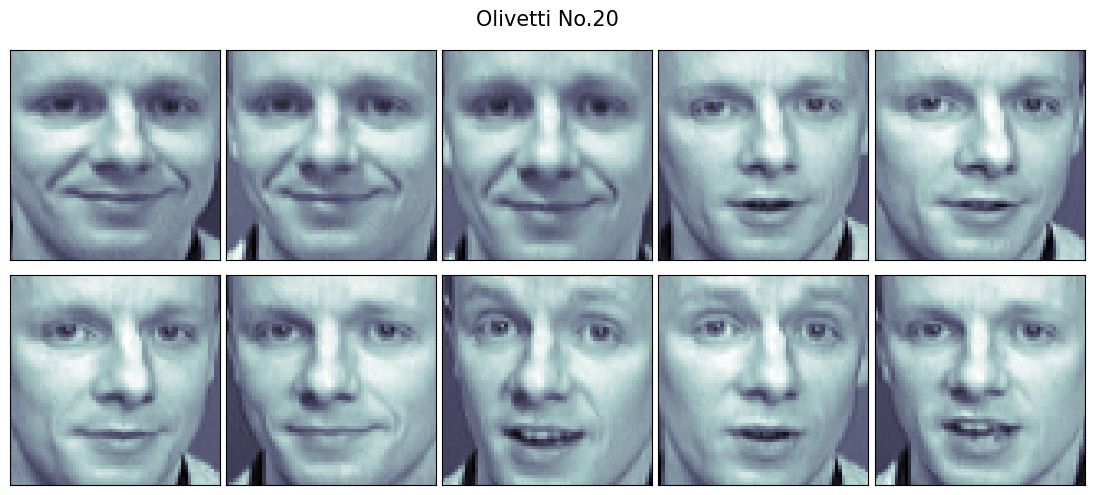

In [19]:
import matplotlib.pyplot as plt

N = 2
M = 5
fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(top=0.3, bottom=0, hspace=0.01, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("Olivetti No.20", fontsize=15)
plt.tight_layout()
plt.show()

## --▶ PCA

- 2개의 성분으로 분석

- － __X__ : 원본

In [6]:
# 원본

X = faces_all.data[faces_all.target==K]
X.shape #--> 10장의 사진 이미지, 각 이미지는 4096 픽셀로 이루어져 있다.

(10, 4096)

In [9]:
X[0].shape

(4096,)

In [10]:
import numpy as np

np.sqrt(4096) #--> 사진은 64 X 64 픽셀 크기이다.

64.0

- － __W__ : PCA 적용

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# PCA
W = pca.fit_transform(X)
W.shape

(10, 2)

In [13]:
W[:5]

array([[-2.2136698 ,  4.213518  ],
       [ 2.2680936 ,  3.7376218 ],
       [ 0.65999496,  3.120953  ],
       [-1.7500497 , -1.40966   ],
       [-3.3963857 , -1.5552849 ]], dtype=float32)

- － __X_inv__ : W를 원본 형태로 환원

In [14]:
# PCA 결과인 W를 다시 원본 X와 동일한 형태로 환원

X_inv = pca.inverse_transform(W)
X_inv.shape

(10, 4096)

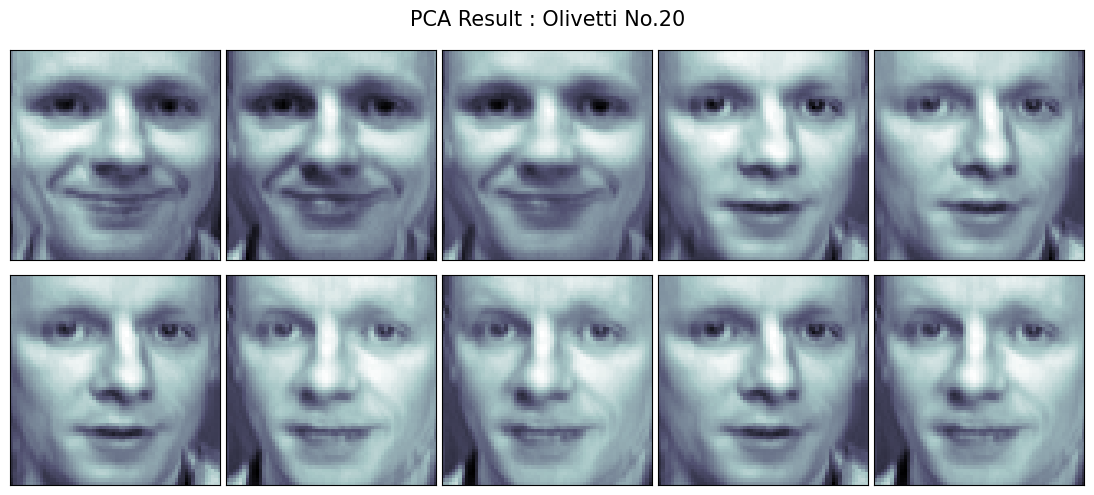

In [23]:
fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(top=0.3, bottom=0, hspace=0.02, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle("PCA Result : Olivetti No.20", fontsize=15)
plt.tight_layout()
plt.show()

## --▶ 원점과 2개의 eigenface

- eigenface : 얼굴 특징의 고유 벡터 조합

- 원점 face : 10장 사진의 평균 `mean`

- 2개의 eigenface (eigen-: 고유한, 독특한)

	PCA로 얻은 2개의 성분 벡터를 각각 이미지로 표현한 것

In [24]:
pca.mean_.shape

(4096,)

In [25]:
face_mean = pca.mean_.reshape(64,64)
face_mean.shape

(64, 64)

In [26]:
pca.components_[0], pca.components_[0].shape

(array([-0.04049513, -0.03625261, -0.02922314, ..., -0.05034618,
        -0.05550933, -0.06788753], dtype=float32),
 (4096,))

In [27]:
face_pc1 = pca.components_[0].reshape(64,64)
face_pc2 = pca.components_[1].reshape(64,64)

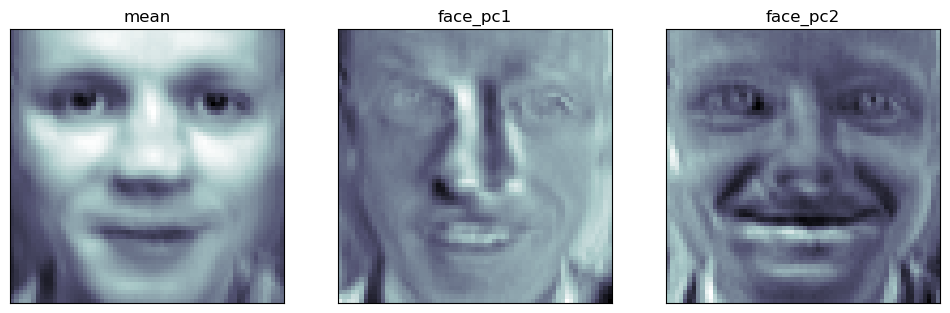

In [31]:
plt.figure(figsize=(12,7))

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("mean")

plt.subplot(132)
plt.imshow(face_pc1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("face_pc1")

plt.subplot(133)
plt.imshow(face_pc2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title("face_pc2")

plt.show()

## --▶ 첫번째 성분 변화

- face_mean + weihgt x face_pc1 $~👉~$ 가중치에 따라 표정이 변한다.

In [33]:
import numpy as np

N = 2
M = 5
weight = np.linspace(-5, 10, N*M)
weight

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

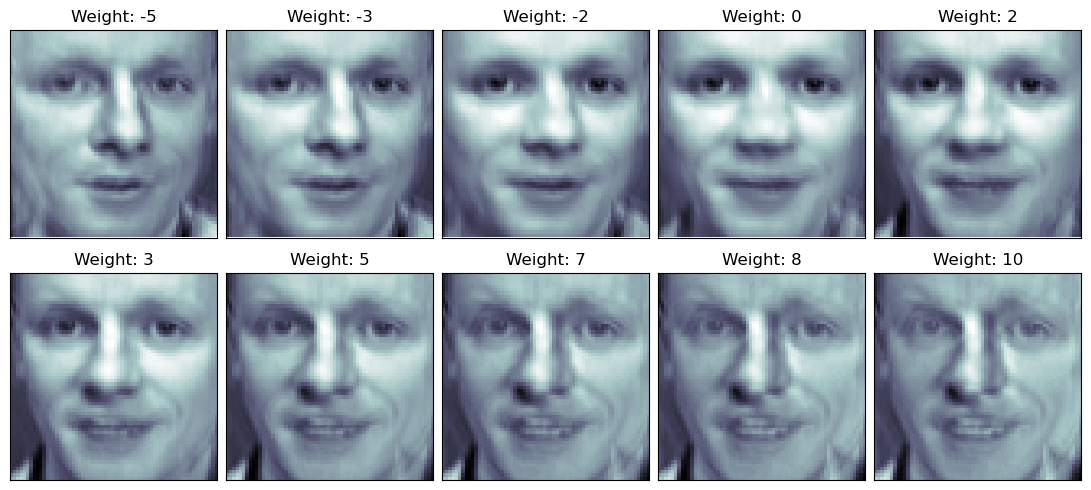

In [36]:
fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(top=0.3, bottom=0, hspace=0.02, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    
    ax.imshow(face_mean + weight[n] * face_pc1, cmap=plt.cm.bone)
    
    ax.grid(False); ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
    plt.title('Weight: '+ str(round(weight[n])))

plt.tight_layout()
plt.show()

## --▶ 두번째 성분 변화

- face_mean + weihgt x face_pc2 $~👉~$ 가중치에 따라 표정이 변한다.

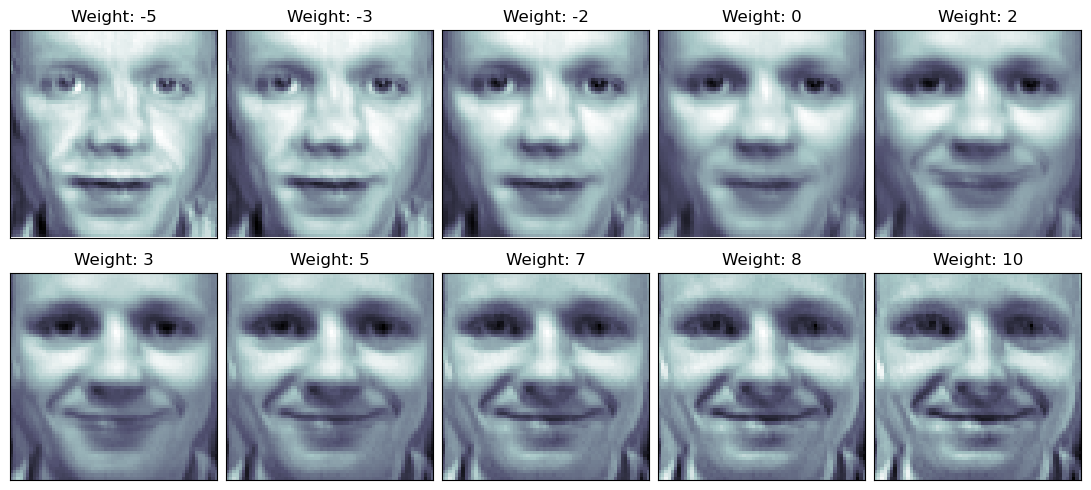

In [37]:
fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(top=0.3, bottom=0, hspace=0.02, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    
    ax.imshow(face_mean + weight[n] * face_pc2, cmap=plt.cm.bone)
    
    ax.grid(False); ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
    plt.title('Weight: '+ str(round(weight[n])))

plt.tight_layout()
plt.show()

## --▶ 2개의 성분 모두 표현

In [40]:
nx, ny = (5,5)
x= np.linspace(-5,8, nx)
y= np.linspace(-5,8, ny)

w1, w2 = np.meshgrid(x, y)
w1, w1.shape

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 (5, 5))

In [41]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1, w1.shape

(array([-5.  , -1.75,  1.5 ,  4.75,  8.  , -5.  , -1.75,  1.5 ,  4.75,
         8.  , -5.  , -1.75,  1.5 ,  4.75,  8.  , -5.  , -1.75,  1.5 ,
         4.75,  8.  , -5.  , -1.75,  1.5 ,  4.75,  8.  ]),
 (25,))

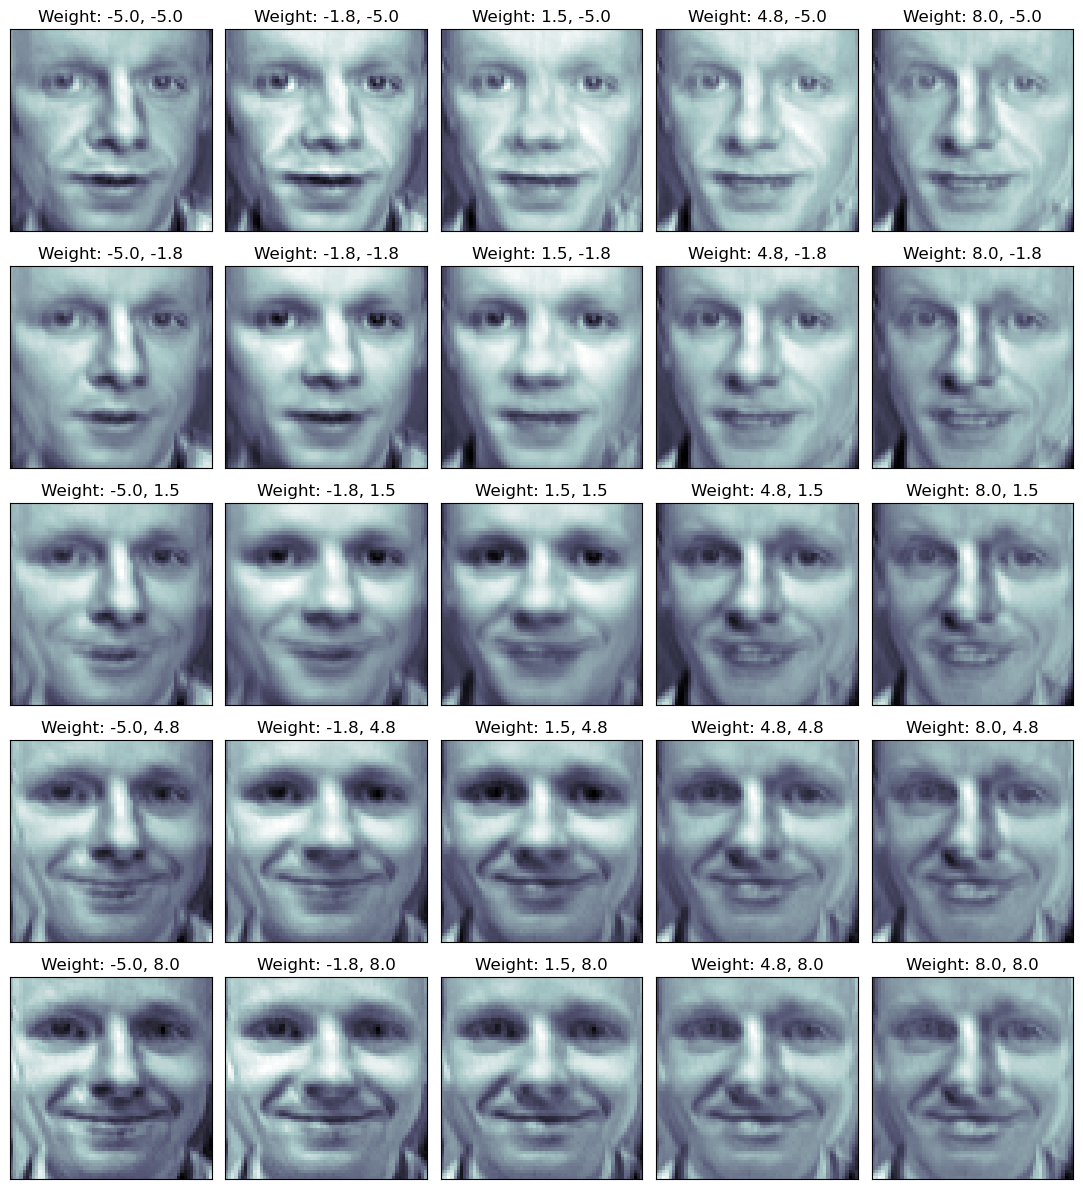

In [45]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=0.3, bottom=0, hspace=0.02, wspace=0.05)

N, M = (5,5)

for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    
    ax.imshow(face_mean + w1[n] * face_pc1 + w2[n] * face_pc2, cmap=plt.cm.bone)
    
    ax.grid(False); ax.xaxis.set_ticks([]); ax.yaxis.set_ticks([])
    plt.title('Weight: '+ str(round(w1[n],1)) + ', ' + str(round(w2[n],1)))

plt.tight_layout()
plt.show()